In [1]:
import numpy as np
import random #not good practice
import matplotlib.pyplot as plt
import math 
import statistics
from scipy import stats
import seaborn as sns

# ND Gaussian Metropolis Hasting

In [2]:
def Gaussian_Metropolis_Hasting(number_of_trials,mu,sigma,ND):
    
    accepted = []
    states = [] # the states of the MH
    current=[]
    kernel_width = [] #random values to start with
    predicted=[]
    probability_of_current=[]
    probability_of_predicted=[]
    keep_up_to_date_kernel_counter = 0   
    
    for dimension in range(0,ND):
        accepted.append(0)
        kernel_width.append(1)
        current.append(random.uniform(-sigma[dimension]+mu[dimension],sigma[dimension]+mu[dimension]))#choose a random number (central) to begin
        predicted.append(0)
        probability_of_current.append(0)
        probability_of_predicted.append(0)
        
    for i in range(1,number_of_trials+1):#repeat per number of trials
        states.append(current) # add the current value to list of MH values
        predicted=[]
        total_probability_current = 1
        total_probability_predicted = 1
        
        for dimension in range(0,ND):
            predicted.append( random.uniform(current[dimension]-kernel_width[dimension],current[dimension]+kernel_width[dimension])) # predict a value, based off how close the running acceptance rate is to ideal 25-27%
            probability_of_current[dimension] = (np.exp((-(current[dimension]-mu[dimension])**2)/(2*sigma[dimension]**2)))  #probability of current value given known distributuin
            probability_of_predicted[dimension] = (np.exp((-(predicted[dimension]-mu[dimension])**2)/(2*sigma[dimension]**2)))  #probability of predicted value given known distributuin
            total_probability_current= total_probability_current * probability_of_current[dimension]
            total_probability_predicted= total_probability_predicted * probability_of_predicted[dimension]

        acceptance = min(total_probability_predicted/total_probability_current,1) # if the proability of predicted is grater than current given the known distribution
        
        
        if random.uniform(0,1)<acceptance: #if the probability of the predicted value is greater than a random float accept it. if not... do nothing
            current = predicted #set the current value to the predicted one
            for dimension in range(0,ND):
                accepted[dimension]=accepted[dimension]+1
        
        for dimension in range(0,ND):

            if accepted[dimension]/i > 0.27: #if the acceptance rate is too high > 27% 
                kernel_width[dimension] = kernel_width[dimension] - ((accepted[dimension]/i)-0.25)# make sure it requires a closer number to current next iteration
            if accepted[dimension]/i < 0.25: #if the acceptance rate is too high > 27% make sure its decreased next iteration
                kernel_width[dimension] = kernel_width[dimension] + (0.27-(accepted[dimension]/(i))) # make sure it requires a further number to current next iteration
        
        keep_up_to_date_kernel_counter= keep_up_to_date_kernel_counter+1
        
        if keep_up_to_date_kernel_counter==15: # we want to restart counting the accepted rate after the warm up period
            for dimension in range(0,ND):
                accepted[dimension]=int(0.26*i) #remove any inconsitency from the warm up period
                keep_up_to_date_kernel_counter=0
             
        
    return states ,accepted;# [burn_in:] # uncomment if having a warm up 20%


### Setting Parameters ###
mu=[10,12,15]
number_of_trials=1000
sigma=[1,2,3] #larger sigmas can have a impact on the acceptance rate. 
number_of_stacks=20 # number of recatngles on graph
ND=3
MH_predictions,accepted =  Gaussian_Metropolis_Hasting(number_of_trials,mu=mu,sigma=sigma,ND=ND) # run the MH prediction: number of iterations, mean and variation. 


In [3]:
MH_predictions

[[10.92455591389244, 13.029048214407148, 12.614838989402466],
 [11.065804014392507, 12.371657751731131, 12.83244238394238],
 [10.995873830392767, 12.347333863810835, 12.87529974747616],
 [10.995873830392767, 12.347333863810835, 12.87529974747616],
 [10.995873830392767, 12.347333863810835, 12.87529974747616],
 [10.148381662011491, 12.047881953303822, 12.38818232848335],
 [10.148381662011491, 12.047881953303822, 12.38818232848335],
 [10.148381662011491, 12.047881953303822, 12.38818232848335],
 [10.148381662011491, 12.047881953303822, 12.38818232848335],
 [10.148381662011491, 12.047881953303822, 12.38818232848335],
 [10.1207598682616, 14.048059433724541, 11.809283420778643],
 [10.1207598682616, 14.048059433724541, 11.809283420778643],
 [10.376070439130899, 15.57750468347599, 13.508288946688264],
 [10.376070439130899, 15.57750468347599, 13.508288946688264],
 [10.376070439130899, 15.57750468347599, 13.508288946688264],
 [10.376070439130899, 15.57750468347599, 13.508288946688264],
 [10.37607

In [4]:
#the acceptance rate is based on the values after the warm up period
#to make the acceptance values include that of the warm up period comment out the lines as indicated above
print('Acceptance Rate:', round(accepted[0]*100/number_of_trials,2),'%') #print the acceptance rate - for accuracry purpose only
    

Acceptance Rate: 26.0 %


In [5]:
x=[]
y=[]
for i in range (0,len(MH_predictions)):
    x.append(MH_predictions[i][0])
    y.append(MH_predictions[i][1])

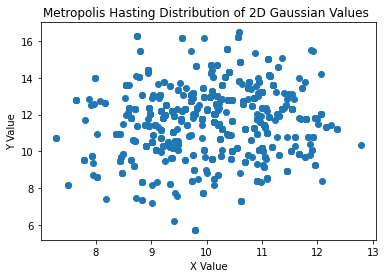

In [6]:

plt.xlabel('X Value')
plt.ylabel('Y Value')
plt.title('Metropolis Hasting Distribution of 2D Gaussian Values ')

plt.scatter(x, y)
plt.show()

## Jarque-Bera Test

In [ ]:
skewness = 

In [ ]:
kurtosis = 

In [ ]:
BS = n[((skewness**2)/6)+(((kurtosis-3)**2)/24)]